In [276]:
import numpy as np
import pandas as pd


In [277]:
df = pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [279]:
# firly we have to deal with the price .
df['MRP'] = df['MRP'].str.replace('₹','')
df['MRP'] = df['MRP'].str.replace(',','')

In [280]:
df['MRP']

0       36990
1       39990
2       32990
3       49990
4       49990
        ...  
715     23490
716     73490
717    194990
718    125990
719     50990
Name: MRP, Length: 720, dtype: object

In [281]:
df['MRP'] = df['MRP'].astype(float)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    float64
 3   Feature  720 non-null    object 
dtypes: float64(2), object(2)
memory usage: 22.6+ KB


<AxesSubplot: >

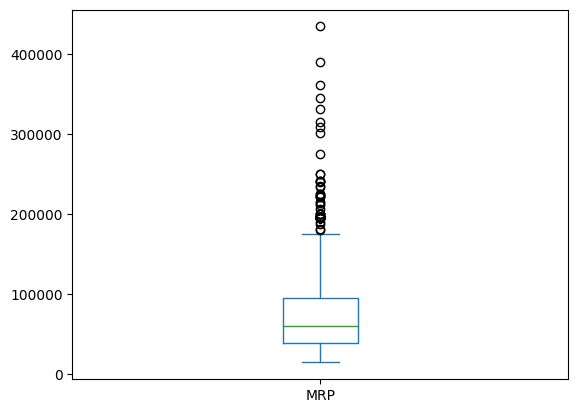

In [283]:
df['MRP'].plot(kind='box')

In [284]:
df['MRP'].mean()

81605.8375

In [285]:
df['MRP'].median()

59990.0

In [286]:
df['MRP'].std()

61552.95510244988

# now we see the ratings of the laptop .

In [287]:
df['Rating'].isnull().value_counts()

# so we see that there are 139 outliers are present.

False    581
True     139
Name: Rating, dtype: int64

In [288]:
df['Rating'].value_counts()

4.2    165
4.3     72
4.4     58
4.1     56
4.6     52
4.5     48
4.0     27
4.9     26
4.7     16
3.9     15
4.8     13
5.0     12
3.7     11
3.8      4
3.5      2
3.6      2
3.4      1
3.0      1
Name: Rating, dtype: int64

<AxesSubplot: >

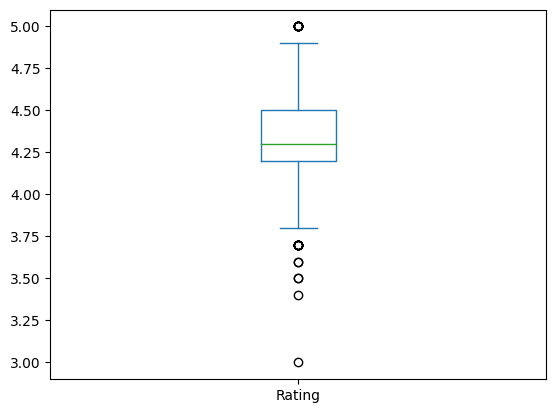

In [289]:
df['Rating'].plot(kind='box')

In [290]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [291]:
df['Rating'].mean()

4.321170395869192

In [292]:
df['Rating'].median()

4.3

In [293]:
df['Rating'] = df['Rating'].fillna(4.3)

In [294]:
df['Rating'].isnull().value_counts()

False    720
Name: Rating, dtype: int64

<AxesSubplot: >

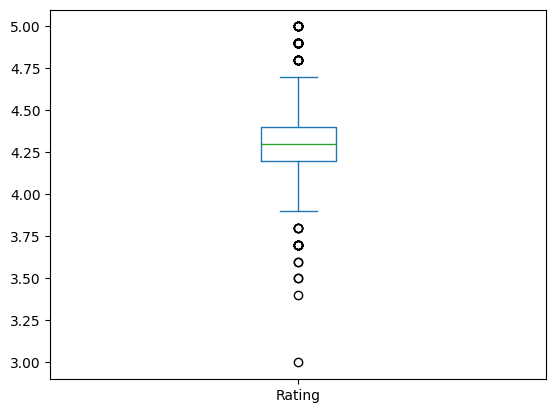

In [295]:
df['Rating'].plot(kind='box')

In [296]:
print(df['Rating'].quantile(0.25))
print(df['Rating'].quantile(0.75))


4.2
4.4


<AxesSubplot: >

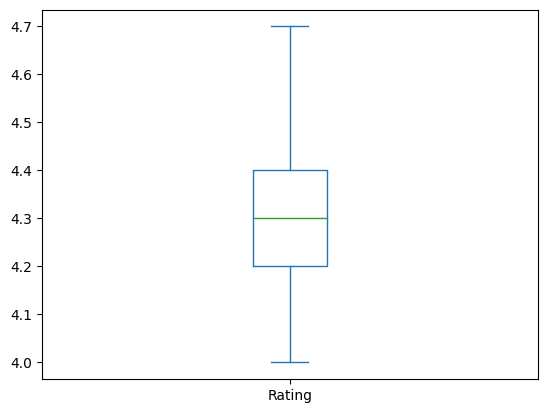

In [297]:
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)

IQR = q3 - q1;

income_lower_bound = q1 - 1.5 * IQR;
income_upper_bound = q3 + 1.5 * IQR;

df2 = df[(df['Rating'] > income_lower_bound) & (df['Rating'] <= income_upper_bound)] 
df2['Rating'].plot(kind='box')

<AxesSubplot: >

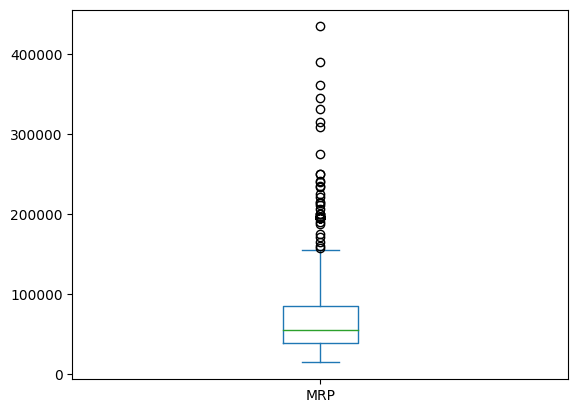

In [298]:
df2['MRP'].plot(kind='box')

<AxesSubplot: ylabel='Frequency'>

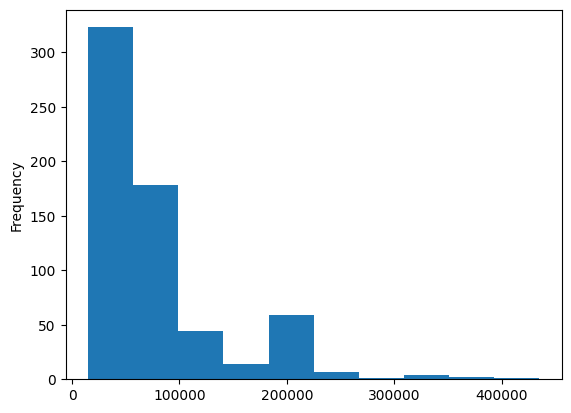

In [299]:
df2['MRP'].plot(kind='hist')

In [300]:
df2.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [301]:
df2.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [302]:
df2['company_name'] = [x.split()[0] for x in df2['Product']]

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_10344\593404773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['company_name'] = [x.split()[0] for x in df2['Product']]


In [303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 719
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       633 non-null    object 
 1   Rating        633 non-null    float64
 2   MRP           633 non-null    float64
 3   Feature       633 non-null    object 
 4   company_name  633 non-null    object 
dtypes: float64(2), object(3)
memory usage: 29.7+ KB


In [304]:
df2.shape

(633, 5)

In [305]:
df2['company_name']

0      Lenovo
1      Lenovo
2        ASUS
3          HP
4        ASUS
        ...  
714        HP
715      ASUS
716    Lenovo
717      ASUS
719    Lenovo
Name: company_name, Length: 633, dtype: object

In [306]:
df2['company_name'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

<AxesSubplot: ylabel='Density'>

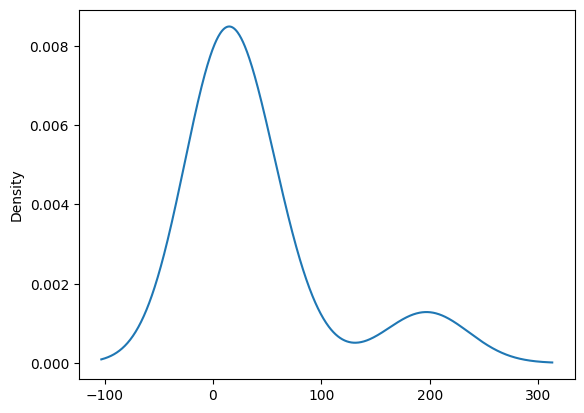

In [307]:
import matplotlib.pyplot as plt
df2['company_name'].value_counts().plot(kind='kde')

In [308]:
df2.head()

,Product,Rating,MRP,Feature,company_name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [309]:
# df2['Feature'][0].split()[0:9]
df2['Feature'] = [x.split()[0:9] for x in df2['Feature']]

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_10344\3195882467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Feature'] = [x.split()[0:9] for x in df2['Feature']]


In [310]:
df2.head()

,Product,Rating,MRP,Feature,company_name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,"[Intel, Core, i3, Processor, (11th, Gen)8, GB,...",Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,"[Intel, Core, i3, Processor, (11th, Gen)8, GB,...",Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,"[Intel, Core, i3, Processor, (10th, Gen)8, GB,...",ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,"[AMD, Ryzen, 5, Hexa, Core, Processor8, GB, DD...",HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,"[Intel, Core, i5, Processor, (10th, Gen)8, GB,...",ASUS


In [311]:
df2['Feature'][3]

['AMD', 'Ryzen', '5', 'Hexa', 'Core', 'Processor8', 'GB', 'DDR4', 'RAM64']

In [312]:
df2['Feature'].value_counts()

[Intel, Core, i3, Processor, (11th, Gen)8, GB, DDR4, RAM64]                85
[AMD, Ryzen, 3, Dual, Core, Processor8, GB, DDR4, RAM64]                   37
[AMD, Ryzen, 5, Quad, Core, Processor8, GB, DDR4, RAM64]                   36
[AMD, Ryzen, 5, Hexa, Core, Processor8, GB, DDR4, RAM64]                   33
[Intel, Core, i5, Processor, (11th, Gen)8, GB, DDR4, RAMWindows]           32
                                                                           ..
[Apple, M1, Processor8, GB, DDR4, RAMMac, OS, Operating, System1]           1
[AMD, Ryzen, 9, Octa, Core, Processor, (5th, Gen)16, GB]                    1
[Intel, Core, i5, Processor, (9th, Gen)8, GB, DDR4, RAM64]                  1
[Qualcomm, Snapdragon, 7c, Gen, 2, Processor4, GB, LPDDR4X, RAMWindows]     1
[Intel, Core, i5, Processor, (12th, Gen)16, GB, DDR5, RAM64]                1
Name: Feature, Length: 133, dtype: int64

In [313]:
df2['Feature'].value_counts()
# df2['Feature'].count()

[Intel, Core, i3, Processor, (11th, Gen)8, GB, DDR4, RAM64]                85
[AMD, Ryzen, 3, Dual, Core, Processor8, GB, DDR4, RAM64]                   37
[AMD, Ryzen, 5, Quad, Core, Processor8, GB, DDR4, RAM64]                   36
[AMD, Ryzen, 5, Hexa, Core, Processor8, GB, DDR4, RAM64]                   33
[Intel, Core, i5, Processor, (11th, Gen)8, GB, DDR4, RAMWindows]           32
                                                                           ..
[Apple, M1, Processor8, GB, DDR4, RAMMac, OS, Operating, System1]           1
[AMD, Ryzen, 9, Octa, Core, Processor, (5th, Gen)16, GB]                    1
[Intel, Core, i5, Processor, (9th, Gen)8, GB, DDR4, RAM64]                  1
[Qualcomm, Snapdragon, 7c, Gen, 2, Processor4, GB, LPDDR4X, RAMWindows]     1
[Intel, Core, i5, Processor, (12th, Gen)16, GB, DDR5, RAM64]                1
Name: Feature, Length: 133, dtype: int64

In [314]:
df2['Feature'].count()

633

In [316]:
df2['Feature'] = [' '.join(x) for x in df2['Feature']]
df2['Feature']

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_10344\2285832134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Feature'] = [' '.join(x) for x in df2['Feature']]


0      Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64
1      Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64
2      Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64
3         AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64
4      Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
                             ...                        
714      AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM64
715    Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716       AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64
717      AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM64
719    Intel Core i5 Processor (10th Gen)8 GB DDR4 RAM64
Name: Feature, Length: 633, dtype: object

In [318]:
df2['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64'

In [325]:
df2.head()

,Product,Rating,MRP,Feature,company_name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [326]:
# def find_amount(company_name,ram,processor):
new_df = df2[df2['Product'].str.contains('HP')]
new_df1 = new_df[df['Feature'].str.contains('8 GB')]
new_df2 = new_df1[df['Feature'].str.contains('Intel Core i5')]

new_df2.head()

    

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_10344\1491632441.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df1 = new_df[df['Feature'].str.contains('8 GB')]
C:\Users\PAWAN\AppData\Local\Temp\ipykernel_10344\1491632441.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df2 = new_df1[df['Feature'].str.contains('Intel Core i5')]


,Product,Rating,MRP,Feature,company_name
24,HP Victus Intel Core i5 12th Gen - (8 GB/512 G...,4.3,65990.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RAM64,HP
52,HP 15s Intel Core i5 12th Gen - (8 GB/512 GB S...,4.2,58990.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RAM64,HP
140,HP 15s Intel Core i5 12th Gen - (8 GB/512 GB S...,4.1,58899.0,Intel Core i5 Processor (12th Gen)8 GB DDR4 RAM64,HP
149,HP Victus Core i5 11th Gen - (8 GB/512 GB SSD/...,4.3,67990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RAM64,HP
308,HP 15s Core i5 11th Gen - (8 GB/512 GB SSD/Win...,4.4,60390.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RAM64,HP


In [349]:
def find_amount(company_name,ram,processor):
    new_df = df2[df2['Product'].str.contains(company_name)]
    new_df1 = new_df[new_df['Feature'].str.contains(ram)]
    new_df2 = new_df1[new_df1['Feature'].str.contains(processor)]
    return new_df2['MRP'].median()

In [350]:
amount = find_amount(company_name="HP",ram="8 GB",processor="Intel Core i5")
print(amount)

63190.0


In [352]:
import pickle
pickle.dump(df2.to_dict(),open('prediction.pkl','wb'))  

In [353]:
df2['company_name'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [355]:
# newd = df2[df2['Feature'].str.contains('')]
df2.head()

,Product,Rating,MRP,Feature,company_name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [369]:
# df3 = df2[df2['Feature'].str.contains('32 GB')]
df2['Feature'].value_counts()
# df3

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64                85
AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64                   37
AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64                   36
AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64                   33
Intel Core i5 Processor (11th Gen)8 GB DDR4 RAMWindows           32
                                                                 ..
Apple M1 Processor8 GB DDR4 RAMMac OS Operating System1           1
AMD Ryzen 9 Octa Core Processor (5th Gen)16 GB                    1
Intel Core i5 Processor (9th Gen)8 GB DDR4 RAM64                  1
Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows     1
Intel Core i5 Processor (12th Gen)16 GB DDR5 RAM64                1
Name: Feature, Length: 133, dtype: int64

In [371]:
new_df = df2[df2['Product'].str.contains('HP')]
new_df1 = new_df[new_df['Feature'].str.contains('4 GB')]
new_df2 = new_df1[new_df1['Feature'].str.contains('Intel Core i5')]

new_df2

,Product,Rating,MRP,Feature,company_name
